# Preparation and Variable Selection


Basiert teilweise auf Franz Kaggle_rendering

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # -> plt.show to plot the respective graph
import seaborn as sns
%matplotlib inline
sns.set() # to change the theme

In [2]:
file=r"C:\Users\bosse\Desktop\Notebooks\Data\Project\Kaggle_Dataset.csv"
df=pd.read_csv(file)
df

,Unnamed: 0,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0
3,3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,222.000000,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,successful,5410.000000,publishing,Radio & Podcasts,1845213665,131,5000.00000,Madrid,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217240,217248,1438234172,Adventures of a Lost Poet,USD,2017-05-31 17:37:07,1,My VERY FIRST book. Chronicling my journey dea...,US,2017-07-15 17:37:07,adventures-of-a-lost-poet,failed,10.000000,publishing,Poetry,1049486300,125,500.00000,Hollywood,45.0
217241,217249,906168648,Lomak - Animated Movie / Series,GBP,2015-01-28 16:43:38,6,About a powerful soldier who is nurtured from ...,GB,2015-03-19 15:43:38,lomak-animated-movie-series,failed,244.588849,film & video,Animation,2096189858,90,40621.01400,London,50.0
217242,217250,708119891,Growing with our people - Gastronomy (Canceled),MXN,2017-07-29 03:07:34,5,We give Mexican producers an opportunity to pr...,MX,2017-09-15 15:00:00,orocafoods-with-mexican-love,canceled,287.559221,food,Farmer's Markets,2013704740,109,17662.55400,Mexico City,48.0
217243,217251,239852131,Carmel - Second Wife Blues | Sad Situation CD ...,GBP,2015-08-30 21:17:44,51,A limited edition CD run of 1000 copies of Car...,GB,2015-09-24 21:17:44,carmel-second-wife-blues-sad-situation-cd-single,successful,1683.874823,music,Blues,197599039,110,1354.03380,London,25.0


In [3]:
# general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217245 entries, 0 to 217244
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     217245 non-null  int64  
 1   id             217245 non-null  int64  
 2   name           217245 non-null  object 
 3   currency       217245 non-null  object 
 4   launched_at    217245 non-null  object 
 5   backers_count  217245 non-null  int64  
 6   blurb          217245 non-null  object 
 7   country        217245 non-null  object 
 8   deadline       217245 non-null  object 
 9   slug           217245 non-null  object 
 10  status         217245 non-null  object 
 11  usd_pledged    217245 non-null  float64
 12  sub_category   217245 non-null  object 
 13  main_category  217245 non-null  object 
 14  creator_id     217245 non-null  int64  
 15  blurb_length   217245 non-null  int64  
 16  goal_usd       217245 non-null  float64
 17  city           217245 non-nul

In [4]:
# reduce to successful and failed projects, only
df.state=df.status[(df.status=="successful")|(df.status=="failed")]
df.state.value_counts(normalize=True)

C:\Users\bosse\AppData\Local\Temp\ipykernel_13848\1327950313.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.state=df.status[(df.status=="successful")|(df.status=="failed")]


successful    0.623145
failed        0.376855
Name: status, dtype: float64

In [5]:
# check for duplicates
df.duplicated().sum() # 0
df.id.duplicated().sum() # 0

24357

In [6]:
# convert date variables
import datetime
df.launched_at.value_counts()[:5] # type object
df['dead']=pd.to_datetime(df['deadline'])
df['launch']=pd.to_datetime(df['launched_at'])
def get_year(x):
    return x.year
df['launched_year']=df['launch'].apply(get_year)

In [7]:
# derive duration of a campaign in different units
from datetime import timedelta
df['duration_s']=(df['dead']-df['launch'])/timedelta(seconds=1)
df['duration_min']=(df['dead']-df['launch'])/timedelta(hours=1)
df['duration_d']=(df['dead']-df['launch'])/timedelta(days=1)
df['duration_mon']=df['duration_s']/86400/30 # derive duration in months
df['duration_y']=df['duration_s']/86400/30/12 # derive duration in years
df[['duration_d','duration_mon','duration_y']].describe() # duration_d is sufficient
df.info()
df.launched_year.value_counts() # outliers for 1970 must be dropped
print(pd.crosstab(df.launched_year,df.state,normalize="index"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217245 entries, 0 to 217244
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     217245 non-null  int64         
 1   id             217245 non-null  int64         
 2   name           217245 non-null  object        
 3   currency       217245 non-null  object        
 4   launched_at    217245 non-null  object        
 5   backers_count  217245 non-null  int64         
 6   blurb          217245 non-null  object        
 7   country        217245 non-null  object        
 8   deadline       217245 non-null  object        
 9   slug           217245 non-null  object        
 10  status         217245 non-null  object        
 11  usd_pledged    217245 non-null  float64       
 12  sub_category   217245 non-null  object        
 13  main_category  217245 non-null  object        
 14  creator_id     217245 non-null  int64         
 15  

#### Deleting duplicates

In [8]:
# Only Successful and failed projects are important for us
df_final=df[(df['status']=='successful')|(df['status']=='failed')]
len(df_final)

202847

In [9]:
df_final.drop_duplicates(keep='first',inplace=True,subset='id')
len(df_final)

C:\Users\bosse\AppData\Local\Temp\ipykernel_13848\4266919766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop_duplicates(keep='first',inplace=True,subset='id')


180677

In [10]:
df_final['id'].value_counts()

1714728788    1
574454559     1
1447919771    1
575248545     1
1443118213    1
             ..
2119307936    1
1853136422    1
1378288601    1
607196300     1
1126079486    1
Name: id, Length: 180677, dtype: int64

#### Variable Selection

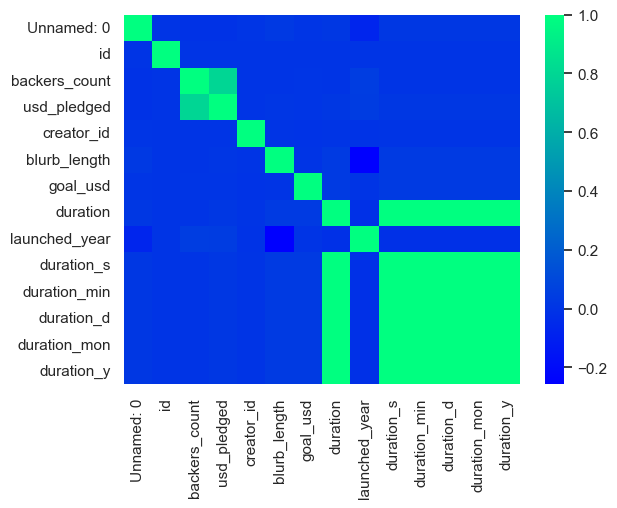

In [11]:
# heatmap for the identification of redundant numerical variables
sns.heatmap(df_final.corr(),cmap='winter');

In [12]:
# deleting of numerical variables
df_final.drop(columns=['duration_s','duration_min','duration_mon','duration_y','duration','Unnamed: 0','blurb_length'],inplace=True)

C:\Users\bosse\AppData\Local\Temp\ipykernel_13848\2804312683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['duration_s','duration_min','duration_mon','duration_y','duration','Unnamed: 0','blurb_length'],inplace=True)


In [13]:
# deleting of some time variables
# Anovo test failed, manuall decision on which variable to focus
df_final.drop(columns=['dead','launch','deadline','launched_at'],inplace=True)

C:\Users\bosse\AppData\Local\Temp\ipykernel_13848\3028786503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['dead','launch','deadline','launched_at'],inplace=True)


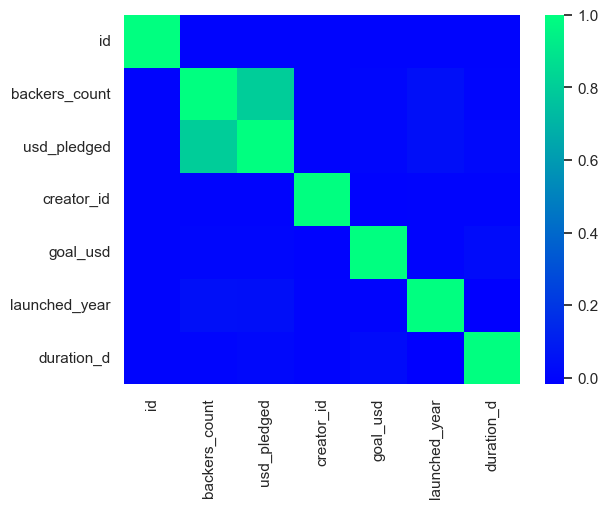

In [14]:
sns.heatmap(df_final.corr(),cmap='winter');

In [15]:
num_list=['id','backers_count',
       'usd_pledged','creator_id', 'goal_usd',
       'launched_year', 'duration_d']

In [16]:
cat_list=['currency','blurb',
       'country','slug', 'status', 'usd_pledged','sub_category',
       'main_category', 'creator_id','city']

In [26]:
# Anova Test for the selection of interesting numerical variables
# Interpretationsschwirigkeiten, daher numerische manuell ausgewählt
import statsmodels.api
for item in num_list:
    print('#####',item)
    result =statsmodels.formula.api.ols(f'{item} ~ status',data=df_final).fit()
    print(statsmodels.api.stats.anova_lm(result))

##### id
                df        sum_sq       mean_sq         F    PR(>F)
status         1.0  7.357709e+16  7.357709e+16  0.192003  0.661255
Residual  180675.0  6.923618e+22  3.832084e+17       NaN       NaN
##### backers_count
                df        sum_sq       mean_sq            F  PR(>F)
status         1.0  2.517713e+09  2.517713e+09  2777.435608     0.0
Residual  180675.0  1.637798e+11  9.064883e+05          NaN     NaN
##### usd_pledged
                df        sum_sq       mean_sq            F  PR(>F)
status         1.0  2.082107e+13  2.082107e+13  1799.415355     0.0
Residual  180675.0  2.090594e+15  1.157102e+10          NaN     NaN
##### creator_id
                df        sum_sq       mean_sq         F    PR(>F)
status         1.0  7.249285e+12  7.249285e+12  0.000019  0.996539
Residual  180675.0  6.960304e+22  3.852389e+17       NaN       NaN
##### goal_usd
                df        sum_sq       mean_sq           F        PR(>F)
status         1.0  2.372236e+14  2.37

In [18]:
# Correlation test for the selecting of interessting categorical variables
import scipy.stats as sc
cat_relevant=[]
cat_drop=[]
for item in cat_list:
    chi2=sc.chi2_contingency(pd.crosstab(df_final['status'],df_final[item]))[1]
    print(item,':',chi2)
    if chi2 <=0.05:
        cat_relevant.append(item)
    else:
        cat_drop.append(item)

currency : 0.0
blurb : 0.1455364113516466
country : 0.0
slug : 0.49889390478627377
status : 0.0
usd_pledged : 0.0
sub_category : 0.0
main_category : 0.0
creator_id : 3.271221184161235e-232
city : 0.0


In [19]:
# Categories of the Project
display(len(pd.DataFrame(df_final['main_category'].value_counts())))
display(len(pd.DataFrame(df_final['sub_category'].value_counts())))

159

15

In [20]:
# Sub categories seems to have broader categories, we chose this because of complexity reduction.
# Same reason for dropping the name variable
cat_drop.append('main_category')
cat_drop.append('name')

In [21]:
df_final.drop(columns=cat_drop,inplace=True)

C:\Users\bosse\AppData\Local\Temp\ipykernel_13848\2741035177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=cat_drop,inplace=True)


#### Save

In [22]:
# Speichern
filename =r'C:\Users\bosse\Desktop\Notebooks\Data\Project\Kaggle_dedub.csv'
f =open(filename,'w',encoding='utf-8')
f.write(df_final.to_csv())
f.close()

In [28]:
df_final['creator_id'].value_counts()

2104052526    60
957058942     46
1077465647    36
897079804     35
172204344     32
              ..
2073233486     1
726159289      1
174809538      1
1174362408     1
1667603717     1
Name: creator_id, Length: 154987, dtype: int64